# Using `icepyx` to search, access and open ICESat-2 data in the cloud

## Overview

`icepyx` is a python package that simplifies querying, accessing and working with ICESat-2 data.  It is also a community of ICESat-2 data users, developers and other members of the scientific community.  `icepyx` is also a fantastic example of the type of collaborative software development, community and knowledge building that we are trying to foster in this hackweek because the project was started at the 2019 ICESat-2 Hackweek.


## Learning Objectives

In this tutorial you will learn how to:

- Use `icepyx` to search for ICESat-2 data
- Access and open the data directly from an S3 bucket in the NASA Earthdata Cloud
- Subset data by variable

## Prerequisites

The workflow described in this tutorial forms the initial steps of an _Analysis in Place_ workflow that would be run on a AWS cloud compute resource.  You will need:

1. a JupyterHub, such as CryoHub, or AWS EC2 instance in the us-west-2 region.
3. a NASA Earthdata Login.  If you need to register for an Earthdata Login see the [Getting an Earthdata Login](https://icesat-2-2023.hackweek.io/preliminary/checklist/earthdata.html#getting-an-earthdata-login) section of the ICESat-2 Hackweek 2023 Jupyter Book.
4. A `.netrc` file, that contains your Earthdata Login credentials, in your home directory. See [Configure Programmatic Access to NASA Servers](https://icesat-2-2023.hackweek.io/preliminary/checklist/earthdata.html#configure-programmatic-access-to-nasa-servers) to create a `.netrc` file.

## Credits

This tutorial is based on a number of tutorials in the `icepyx` documentation.  See this [documentation](https://icepyx.readthedocs.io/en/latest/index.html) for more information.

## Computing Environment

We will use `icepyx` to search for and subset data granules.  However, currently, `icepyx` does not get AWS tokens.  Fortunately, we can use `earthaccess` (see [the `earthaccess` tutorial](earthaccess.ipynb)) to do this for us.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
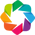

In [1]:
import warnings
warnings.filterwarnings("ignore")

import icepyx as ipx
import earthaccess

import h5py

import geopandas as gpd
from shapely.geometry import Point

## Create an `icepyx` Query object

`icepyx` uses similar search parameters to `earthaccess`.  The data product is defined by the `short_name`.  Spatial and temporal filters are defined using `spatial_extent` and a `date_range`.  Spatial extent may be defined as a bounding box, a polygon or a shapefile of GeoJSON vector file. 

In [2]:
result = ipx.Query(
    product="ATL06",
    spatial_extent = [-134.7,58.9,-133.9,59.2],
    date_range = ['2020-03-01','2020-04-30'],
)

Products can also be queried by version, orbital cycle and reference ground track.  See `icepyx` [API documentation](https://icepyx.readthedocs.io/en/latest/_icepyx/icepyx.Query.html#icepyx.Query) for more information.

## Get information about available granules

`icepyx.Query` returns a `Query` object that contains information about the number of granules found and the size of those granules.  To return a list of granule ids, set keywords `ids=True`.  Setting `cycles=True` and `tracks=True` returns lists of orbital cycles and reference ground tracks.   

In [3]:
gran_id = result.avail_granules()
gran_id

{'Number of available granules': 4,
 'Average size of granules (MB)': 21.579402685125,
 'Total size of all granules (MB)': 86.3176107405}

To directly access ICESat-2 granules in the NASA Earthdata Cloud from an in-region AWS compute reource, you need the S3 links to these granules.  To get these links, rerun the search Query and then call `aval_granules(`cloud=True`).

```{warning}
Calling `avail_granules(cloud=True)` without rerunning the search query returns an empty list.  If you know you want granule ids, cycles and RGTs, in addition to the S3 links, set all four keywords to `True`. 
```

In [4]:
result = ipx.Query(
    product="ATL06",
    spatial_extent = [-134.7,58.9,-133.9,59.2],
    date_range = ['2020-03-01','2020-04-30'],
)
s3links = result.avail_granules(cloud=True)[0]  # returns a nested list, get first element
s3links

['s3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/03/10/ATL06_20200310121504_11420606_006_01.h5',
 's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/03/12/ATL06_20200312233336_11800602_006_01.h5',
 's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/04/10/ATL06_20200410220936_02350702_006_02.h5',
 's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/04/12/ATL06_20200412104246_02580706_006_02.h5']

A similar search can be run using the Reference Ground Track and Orbital Cycle as search parameters.  In this example, the search query is run for RGT 1142 of cycle 06, which is the first granule returned by the search above.

In [5]:
result = ipx.Query(
    product="ATL06",
    spatial_extent = [-134.7,58.9,-133.9,59.2],  # must be included
    cycles = ['06'],
    tracks = ['1142']
)
s3links = result.avail_granules(cloud=True)[0]
s3links

['s3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/03/10/ATL06_20200310121504_11420606_006_01.h5']

## Access and Open an ICESat-2 granule directly from the S3 bucket

Search queries can be run without authenticating with Earthdata Login.  To access data stored in an S3 bucket, you need to authenticate with Earthdata Login, and start an S3 session.  At the moment, `icepyx` is used to authenticate with Earthdata Login and get S3 credentials.  `earthaccess` is used to start an S3 session. 

In [6]:
result.earthdata_login(s3token=True)  # Authenticate and get credentials

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 09/19/2023
Using .netrc file for EDL


In [7]:
s3 = earthaccess.get_s3fs_session(daac='NSIDC')  # Start a S3 session - can we use earthaccess.open here

As with the `earthaccess` direct access example, we have to create a virtual local file system before we can read a file.  

We could open the file using `xarray`.  However, to demonstrate another access method, we will use h5py, a package for reading HDF5 files.  We then put these into a `geopandas.GeoDataFrame`.

The `h5py.File` method returns a file object.  This is the entry point to the HDF5 file. 

In [8]:
file = s3.open(s3links[0], 'rb')

fh = h5py.File(file, 'r')
fh

<HDF5 file "ATL06_20200310121504_11420606_006_01.h5>" (mode r)>

HDF5 files are hierarchical structures similar to the directory structure on your computer.  Groups are analogous to directories, which can contain other Groups or Datasets.  The File Object (`fh`) is the root group.  Datasets are variables and are collected under a Group.  They contain multi-dimensional arrays of data values.  Groups and Datasets can have attributes that contain metadata, for example units of data values in a Dataset.

To access a particular dataset, you have to know the path to that dataset.  All ICESat-2 data products have a data dictionary that includes the path to all variables, along with datatype, standard name, units and a description.

In this example, I want to get Land Ice Height from the left beam of the first beam pair, along with geolocation, time, error and quality.  From inspecting the [data dictionary for ATL06](https://nsidc.org/sites/default/files/documents/technical-reference/icesat2_atl06_data_dict_v006.pdf), I can see that all of this data is included in the `gt1l/land_ice_segments` group.  The are also subgroups within this group that contain other data but, in this case, I don't want that data.

`icepyx` has a handy variables lookup for ICESat-2 products.  I can use this method to return a full list of paths to variables in the ATL06 file and filter this list to get just the variables under `gt1l/land_ice_segments`.

I use a python dictionary comprehension to loop through `varlist` with two conditionals to add only variables that directly under the `gt1l/land_ice_segment` group.  The first checks that the path is in the group.  The second checks that the variable is in the first level of this group by counting the number of `/` in the path.

Finally, I use `split('/')[-1]` to extract the variable name as the last component of the path, and create a dictionary entry with this name as the key and the path as the value.

In [9]:
varlist = result.order_vars.avail()
variables_to_get = {
    var.split('/')[-1]: var for var in varlist if var.startswith('gt1l/land_ice_segments') & (var.count('/') == 2)
}
variables_to_get

{'atl06_quality_summary': 'gt1l/land_ice_segments/atl06_quality_summary',
 'delta_time': 'gt1l/land_ice_segments/delta_time',
 'h_li': 'gt1l/land_ice_segments/h_li',
 'h_li_sigma': 'gt1l/land_ice_segments/h_li_sigma',
 'latitude': 'gt1l/land_ice_segments/latitude',
 'longitude': 'gt1l/land_ice_segments/longitude',
 'segment_id': 'gt1l/land_ice_segments/segment_id',
 'sigma_geo_h': 'gt1l/land_ice_segments/sigma_geo_h'}

I want to work with these variables in a `geopandas.DataFrame`.  Dataframes are convenient data structures for tabular data.  The Python package `pandas` is a powerful tool for working with Dataframes.  `geopandas` is an extension to pandas that adds georeferencing.  Essentially, `geopandas` adds an extra `geometry` column to a pandas.Dataframe and provides methods for geospatial queries. 

```{note}
What is often called "GIS data" can be thought of as a table of data, where each row of that table is associated with some geospatial object: either a point, line or polygon.  We can think of along-track ICESat-2 data as a set of georeferenced points, with each point having a set of attributes such as height, surface type, quality, etc.
```

There are several ways to create a `geopandas.Dataframe`.  In this example, I create a dictionary of variables, read from the HDF5 file using the syntax `fh[path_to_variable][:]` and use the variable name as the key for this dictionary.  I also create a list of Point geometries from latitude and longitude variables, which represent the center points of the land ice height segments.  The `data` dictionary and `geometry` list are used to create the `GeoDataFrame` object.  I also define the Coordinate Reference System (`crs`) for the `geometry` as WGS 84 using the EPSG code 4326.  The CRS makes the data georeferenced as it relates the longitude and latitude values of each point to a location on Earth.

In [10]:
data = {varname: fh[varpath][:] for varname, varpath in variables_to_get.items() if varname not in ['latitude', 'longitude']}
geometry = [Point(lon, lat) for lon, lat in zip(fh[variables_to_get['longitude']], fh[variables_to_get['latitude']])]

fh.close()  # close the file

In [11]:
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")
gdf

atl06_quality_summary    delta_time          h_li    h_li_sigma  \
0                        1  6.907771e+07  3.402823e+38  3.402823e+38   
1                        1  6.907771e+07  3.402823e+38  3.402823e+38   
2                        1  6.907771e+07  3.402823e+38  3.402823e+38   
3                        1  6.907771e+07  3.402823e+38  3.402823e+38   
4                        1  6.907771e+07  3.402823e+38  3.402823e+38   
..                     ...           ...           ...           ...   
859                      1  6.907776e+07  3.402823e+38  3.402823e+38   
860                      1  6.907776e+07  3.402823e+38  3.402823e+38   
861                      1  6.907776e+07  3.402823e+38  3.402823e+38   
862                      1  6.907776e+07  3.402823e+38  3.402823e+38   
863                      1  6.907776e+07  3.402823e+38  3.402823e+38   

     segment_id   sigma_geo_h                     geometry  
0        673338  3.402823e+38  POINT (-134.37842 59.09455)  
1        673359  3.402823e+38  POINT (-134.37922 59.09080)  
2        673473  3.402823e+38  POINT (-134.38364 59.07043)  
3        673489  3.402823e+38  POINT (-134.38425 59.06757)  
4        673490  3.402823e+38  POINT (-134.38429 59.06739)  
..          ...           ...                          ...  
859      690101  3.402823e+38  POINT (-134.94438 56.09580)  
860      690108  3.402823e+38  POINT (-134.94461 56.09455)  
861      690111  3.402823e+38  POINT (-134.94471 56.09401)  
862      690112  3.402823e+38  POINT (-134.94474 56.09383)  
863      690213  3.402823e+38  POINT (-134.94811 56.07576)  

[864 rows x 7 columns]

## Summary

This tutorial has introduced `icepyx`, shown how to search for ICESat-2 data using spatial and temporal filters, and also reference ground tracks and orbital cycles.  It has shown how to access a file hosted on AWS S3, read that file using `h5py`, extract a subset of variables, and create a `geopandas.GeoDataFrame`.

## References

[`icepyx` documentation](https://icepyx.readthedocs.io/en/latest/index.html)  
[`icepyx` ICESat-2 cloud data access tutorial](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_cloud_data_access.html)  
[GeoPandas documentation](https://geopandas.org/en/stable/)  
[`h5py` documentation](https://docs.h5py.org/en/stable/)  
[An introduction to HDF5](https://portal.hdfgroup.org/display/HDF5/Introduction+to+HDF5)

This [O'Reilly book](https://www.oreilly.com/library/view/python-and-hdf5/9781491944981/) by Andrew Collete on HDF5 is a useful introduction as well.